## Install libraries and load utils

In [ ]:
!pip install pytrec_eval
!pip install sentence_transformers
import pytrec_eval
import json
import tqdm
import numpy as np
from google.colab import drive
drive.mount('/content/gdrive')
COLAB_RUN = True
if COLAB_RUN:
  base_path = "./gdrive/MyDrive/ChatGPT-RetrievalQA/"
else:
  base_path = "./"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Analyzing the data 

In [ ]:
def read_collection(f_path):
  corpus = {}
  with open(f_path, "r") as fp:
    for line in tqdm.tqdm(fp, desc="reading {}".format(f_path)):
      did, dtext = line.strip().split("\t")
      corpus[did] = dtext
  return corpus

In [ ]:
import numpy as np
def get_stat_list(arr):
  print("minimum of arr : ", min(arr))
  print("maximum of arr : ", max(arr)) 
  print("avg of arr : ", sum(arr)/len(arr)) 
  print("Q1 quantile of arr : ", np.quantile(arr, .25))
  print("Q2 quantile of arr : ", np.quantile(arr, .50))
  print("Q3 quantile of arr : ", np.quantile(arr, .75))
  print("90% quantile of arr : ", np.quantile(arr, .90))
  print("95% quantile of arr : ", np.quantile(arr, .95))
  print("99% quantile of arr : ", np.quantile(arr, .99))
  print("99.5% quantile of arr : ", np.quantile(arr, .995))
  print("99.9% quantile of arr : ", np.quantile(arr, .999))

In [ ]:
f_path = base_path + "queries.tsv"
queries = read_collection(f_path)
len_queries = [len(item)/4.7 for item in list(queries.values())]
get_stat_list(len_queries)

reading ./gdrive/MyDrive/ChatGPT-RetrievalQA/queries.tsv: 24322it [00:00, 135527.87it/s]


minimum of arr :  2.7659574468085104
maximum of arr :  130.0
avg of arr :  35.31354154456116
Q1 quantile of arr :  20.21276595744681
Q2 quantile of arr :  36.59574468085106
Q3 quantile of arr :  47.87234042553191
90% quantile of arr :  55.53191489361702
95% quantile of arr :  62.76595744680851
99% quantile of arr :  89.95531914893635
99.5% quantile of arr :  95.74468085106382
99.9% quantile of arr :  103.62489361702133


In [ ]:
f_path = base_path + "collection_h.tsv"
collection_h = read_collection(f_path)
len_h = [len(item)/4.7 for item in list(collection_h.values())]
get_stat_list(len_h)

reading ./gdrive/MyDrive/ChatGPT-RetrievalQA/collection_h.tsv: 58546it [00:00, 85423.43it/s]


minimum of arr :  1.0638297872340425
maximum of arr :  7828.297872340425
avg of arr :  144.81161930498797
Q1 quantile of arr :  44.680851063829785
Q2 quantile of arr :  89.7872340425532
Q3 quantile of arr :  175.53191489361703
90% quantile of arr :  325.1063829787234
95% quantile of arr :  455.9574468085106
99% quantile of arr :  854.3723404255326
99.5% quantile of arr :  1074.9734042553207
99.9% quantile of arr :  1717.893617021284


In [ ]:
f_path = base_path + "collection_c.tsv"
collection_c = read_collection(f_path)
len_c = [len(item)/4.7 for item in list(collection_c.values())]
get_stat_list(len_c)

reading ./gdrive/MyDrive/ChatGPT-RetrievalQA/collection_c.tsv: 26882it [00:00, 35485.71it/s]


minimum of arr :  3.404255319148936
maximum of arr :  746.3829787234042
avg of arr :  214.61359891218999
Q1 quantile of arr :  160.2127659574468
Q2 quantile of arr :  214.68085106382978
Q3 quantile of arr :  263.40425531914894
90% quantile of arr :  311.9148936170213
95% quantile of arr :  344.6808510638298
99% quantile of arr :  412.3808510638295
99.5% quantile of arr :  445.8712765957449
99.9% quantile of arr :  524.6453191489344


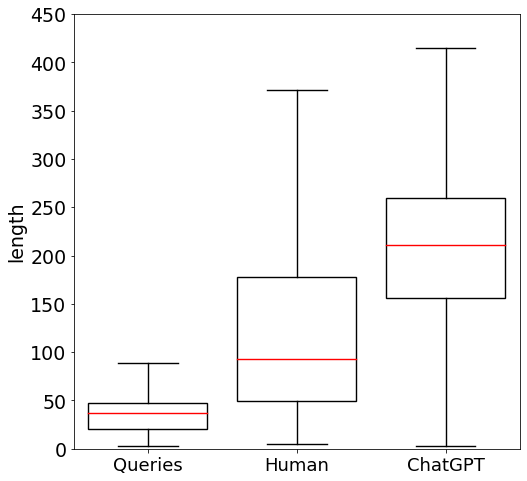

In [ ]:
import numpy as np
import pandas as pd
np.random.seed(44)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
queries = len_queries#[2,	20,	47,	130]#,	2606.595745]
human = len_h#[1,	44,	175,	7828]#,	5031.2]
chatgpt = len_c#[3,	160,	263,	746]

df = pd.DataFrame(list(zip(queries, human, chatgpt, )),
               columns =['Queries', "Human", 'ChatGPT'])
# Plotting basic Box Plot:
# sns.boxplot(x="day", y="total_bill", data=tips)
# sns.boxplot(data=df)
# deep, muted, bright, pastel, dark, colorblind
# sns.boxplot(data=df, orient ='h', palette='Set2')
# for paletter in ['Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r']:

# sns.boxplot(data=df, orient ='h', palette='bwr_r')

PROPS = {
    'boxprops':{'facecolor':'white', 'edgecolor':'black'},
    'medianprops':{'color':'red'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'},
}


plt.figure(figsize=(8, 8))

ax = sns.boxplot(data=df,
            showfliers=False,
            linewidth=1.4,
            # orient ='h',
            **PROPS
            )
increase_size = 6
# boxes = ax.artists
for ytick in ax.get_yticklabels():
    ytick.set_color("black")
    ytick.set_fontsize(13+increase_size)
for xtick in ax.get_xticklabels():
    xtick.set_color("black")
    xtick.set_fontsize(12+increase_size)
# for i,box in enumerate(boxes):
#     box.set_facecolor('w')
ax.set(ylim=(0, 450))

# plt.xlabel('Context length', fontsize=13+increase_size, color="black")
plt.ylabel('length', fontsize=13+increase_size, color="black")
# plt.ylabel('Datasets', fontsize=15)
# plt.legend(loc="upper right")
plt.savefig("boxplot.pdf")
